In [1]:
import pickle
from rdkit import Chem
from smiles_to_bandgap import get_bandgap_openbabel
from utils import sa_score, pickle_to_data, percentage_unique
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# import qm9 dataset
train_smiles_list, train_bandgap = pickle_to_data("data//qm9_key_smiles_1_full_train_data.pickle")
holdout_smiles_list, holdout_bandgap = pickle_to_data("data/qm9_key_smiles_1_holdout_data.pickle")
full_qm9_smiles_list = train_smiles_list + holdout_smiles_list

In [8]:
full_qm9_smiles_list

['C',
 'N',
 'O',
 'C#C',
 'C#N',
 'C=O',
 'CC',
 'CO',
 'CC#C',
 'CC#N',
 'NC=O',
 'CCO',
 'COC',
 'C1CC1',
 'C1CO1',
 'CC(=O)C',
 'CC(=O)N',
 'NC(=O)N',
 'CC(C)C',
 'CC(C)O',
 'C(#C)C#C',
 'C(#C)C#N',
 'N#CC#N',
 'O=CC#C',
 'O=CC#N',
 'O=CC=O',
 'CC#CC',
 'CCC#C',
 'CCC#N',
 'NCC#N',
 'OCC#C',
 'OCC#N',
 'CCC=O',
 'CNC=O',
 'COC=O',
 'OCC=O',
 'CCCO',
 'CCOC',
 'OCCO',
 'CC1CC1',
 'C[C@H]1CO1',
 'CN1CC1',
 'OC1CC1',
 'C1CCC1',
 'C1COC1',
 'CC(=NO)C',
 '[nH]1cccc1',
 'o1cccc1',
 'o1ccnc1',
 'CC(C)(C)C',
 'CC(C)(C)O',
 'CC(=O)C#C',
 'CC(=O)C#N',
 'NC(=O)C#C',
 'CC(=O)C=O',
 'NC(=O)C=O',
 'CC(C)C#C',
 'CC(C)C#N',
 'C[C@@H](N)C#N',
 'C[C@@H](O)C#C',
 'C[C@@H](O)C#N',
 'CC(C)C=O',
 'C[C@@H](O)C=O',
 'CN(C)C=O',
 'CC(=O)CO',
 'CCC(=O)C',
 'CCC(=O)N',
 'CNC(=O)C',
 'CNC(=O)N',
 'CO[C](C)[NH]',
 'COC(=O)C',
 'COC(=O)N',
 'CC(C)CO',
 'C[C@@H](O)CO',
 'CCC(C)C',
 'CC[C@@H](C)O',
 'COC(C)C',
 'CC1(C)CC1',
 'CC1(C)CO1',
 'CC1(O)CC1',
 'O=C1CCC1',
 'O=C1CCN1',
 'O=C1CCO1',
 'O=C1CNC1',
 'O=C1COC1

In [3]:
# export test smiles to usable file 
def write_smiles_to_file(smiles_list, fname):
    """Write a list of SMILES to a file."""
    with open(fname, 'w') as f:
        for smiles in smiles_list:
            f.write(smiles + "\n")
            
train_smiles = train_smiles_list
write_smiles_to_file(train_smiles, 'mols.smi')

band gap distribution of QM9

In [ ]:
qm9_all_bandgaps = []
qm9_size = len(train_smiles_list)
for i, smiles in enumerate(train_smiles_list):
    qm9_all_bandgaps.append(get_bandgap_openbabel(smiles))
    if i % 100 == 0:
        print(str(i) + ' out of ' + str(qm9_size) + ' processed')
        np.save('qm9_all_bandgaps.npy', np.array(qm9_all_bandgaps), )

band gap distribution of truncated qm9 dataset

Text(0.5, 0, 'bandgap (XTB)')

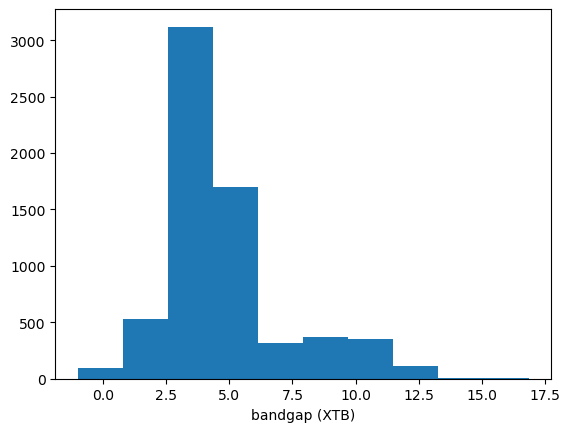

In [11]:
plt.hist(np.load('qm9_all_bandgaps.npy'))
plt.xlabel('bandgap (XTB)')

In [14]:
soft = np.load('data/logs/Scores.npy')
hard = np.load('data/logs_hardthreshold/Scores.npy')

In [17]:
soft.shape

(2, 100)

Text(0, 0.5, 'score')

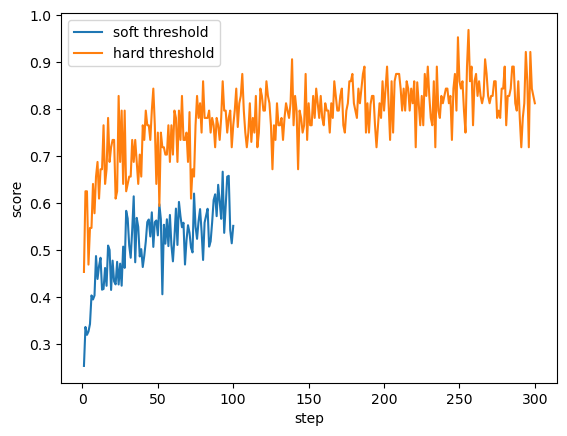

recieved SIGTERM, terminating...
recieved SIGTERM, terminating...
external termination of xtb
external termination of xtb
ERROR STOP 
ERROR STOP 

Error termination. Backtrace:

Error termination. Backtrace:
#0  0x108ecf2b6
#0  0x105c6e2b6
#1  0x108ed01a5
#2  0x108ed1a14
#1  0x105c6f1a5
#3  0x107e90b2f
#2  0x105c70a14
#4  0x107e90e4e
#3  0x104c2fb2f
#5  0x7ff80398a5ec
#4  0x104c2fe4e
#6  0x7ff8039589b4
#5  0x7ff80398a5ec
#7  0x1094b4b6c
#6  0x106254cae
#8  0x1094b23ec
#7  0x1062513ec
#9  0x107e8a72d
#8  0x104c2972d
#10  0x10803b4de
#9  0x104dda4de
#10  0x104d11bcf
#11  0x107f72bcf
#11  0x1044a7406
#12  0x107708406
#13  0x107717440
#12  0x1044b6440
#14  0x7ff80360341e
#13  0x7ff80360341e


In [24]:
plt.plot(soft[0, :], soft[1, :], label='soft threshold')
plt.plot(hard[0, :], hard[1, :], label='hard threshold')
plt.legend()
plt.xlabel('step')
plt.ylabel('score')

In [28]:
get_bandgap_openbabel(example_smiles)

normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


11.866

SA scores  
Ertl & Schuffenhauer 2009: https://jcheminf.biomedcentral.com/articles/10.1186/1758-2946-1-8

score is between 1 and 10

In [4]:
sa_score(['NC(=O)c1ccccc1'])

[1.1592175456870955]

Uniqueness from training set

In [3]:
smiles = ['NC(=O)c1ccccc1', 'garbage']
percentage_unique(smiles)

0.5

In [6]:
np.array([1, 2, 3]) < 3

array([ True,  True, False])